In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random.seed(45)
# np.random.seed(100)
# np.random.seed(334)
try_random = True

while try_random:
    input_mat = np.random.uniform(size=(3,3))
    sig_hyd = (1.0/3.0)*np.trace(input_mat)*np.eye(3)
    dev_mat = input_mat - sig_hyd
    w, v = np.linalg.eig(dev_mat)
    
    if np.iscomplex(w[0]) or np.iscomplex(w[1]) or np.iscomplex(w[2]):
        continue
    else:
        break        

In [3]:
c1 = w[0] - w[1]
c2 = 2*(w[1] - w[2])
c3 = 3*w[2] + 1

In [4]:
x1, y1 = -0.5, 0
x2, y2 = 0.5, 0
x3, y3 = 0, np.sqrt(3)/2

In [5]:
x_star = c1*x1 + c2*x2 + c3*x3 
y_star = c1*y1 + c2*y2 + c3*y3

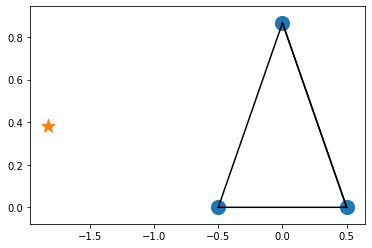

In [6]:
plt.figure()
plt.plot([x1,x2,x3],[y1,y2,y3],color='black')
plt.plot([x2,x3,x1],[y2,y3,y1],color='black')
plt.scatter([x1,x2,x3],[y1,y2,y3],marker="o",s=200)
plt.scatter([x_star],[y_star],marker="*",s=200)
plt.show()

In [7]:
def segment_closest_point(x1,y1,x2,y2,x_star,y_star):
    
    a = y1 - y2
    b = x2 - x1
    c = x1*y2 - x2*y1
    
    k = ((y2-y1) * (x_star-x1) - (x2-x1) * (y_star-y1)) / ((y2-y1)**2 + (x2-x1)**2)
    xe = x_star - k * (y2-y1)
    ye = y_star + k * (x2-x1)
    
    # Check if projection is between end points
    dp = np.sqrt((y2-y1)**2 + (x2-x1)**2)
    d2 = np.sqrt((y2-ye)**2 + (x2-xe)**2)
    d1 = np.sqrt((y1-ye)**2 + (x1-xe)**2)
    
    if d2 + d1 - dp < 1.0e-8: # Projection point is between end points
        xe1, ye1 = xe, ye
        de = np.abs(a*x_star + b*y_star + c)/(a*a+b*b)
        return xe1, ye1, de
    else:
        d1 = np.sqrt((y_star-y1)**2 + (x_star-x1)**2)
        d2 = np.sqrt((y_star-y2)**2 + (x_star-x2)**2)

        if d1 < d2:
            xe1, ye1 = x1, y1
            de = d1

        else:
            xe1, ye1 = x2, y2
            de = d2

        return xe1, ye1, de

In [8]:
x1vals = [x1,x2,x3,x1]
x2vals = [x2,x3,x1,x2]
y1vals = [y1,y2,y3,y1]
y2vals = [y2,y3,y1,y2]

xe = 0; ye = 0; de = np.inf
for i in range(4):
    xe_, ye_, de_ = segment_closest_point(x1vals[i],y1vals[i],x2vals[i],y2vals[i],x_star,y_star)
    
    if de_ < de:
        xe = xe_; ye = ye_;

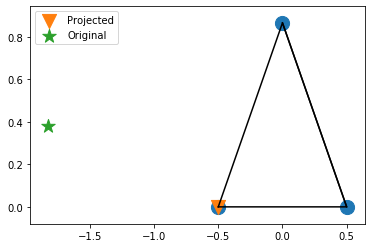

In [9]:
plt.figure()
plt.plot([x1,x2,x3],[y1,y2,y3],color='black')
plt.plot([x2,x3,x1],[y2,y3,y1],color='black')
plt.scatter([x1,x2,x3],[y1,y2,y3],marker="o",s=200)
plt.scatter([xe],[ye],marker="v",s=200,label='Projected')
plt.scatter([x_star],[y_star],marker="*",s=200,label='Original')
plt.legend()
plt.show()

In [ ]:
# Reconstruct eigenvalues from Barycentric coordinates
tmat = np.zeros(shape=(2,2))
tmat[0,0] = x1-x3; tmat[0,1] = x2-x3;
tmat[1,0] = y1-y3; tmat[1,1] = y2-y3;
r = np.zeros(shape=(2,1))
r[0,0] = x_star - x3
r[1,0] = y_star - y3

lvals = np.matmul(np.linalg.inv(tmat),r)
l1 = lvals[0,0]
l2 = lvals[1,0]

l3 = 1.0 - l2 - l1

In [ ]:
# Reconstruct eigenvectors (to be done)